In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

root = '/project/wyin/jlee/ml-project'
root = "/project/wyin/jlee/ml-project"
data_loc = os.path.join(root, "data-collection/full-dataset/data")

In [6]:
disp = np.loadtxt(os.path.join(data_loc, f'param_-0.20_0.20_0.200', 'disp_00-11-10-00.dat'))
print(disp.shape == (193, 6))

True


In [23]:
#Load data
params = []
disp_data = []
for t1 in np.linspace(-0.5, 0.5, 51):
    for t2 in np.linspace(-0.5, 0.5, 51):
        for j in np.linspace(0.2, 1.0, 51):
            disp = np.loadtxt(os.path.join(data_loc, f'param_{t1:.2f}_{t2:.2f}_{j:.3f}', 'disp_00-11-10-00.dat'))
            disp_data.append(disp[:, 1])
            params.append([t1, t2, j])
            
    print(f't1: {t1} completed')

params = np.array(params)
disp_data = np.array(disp_data)

t1: -0.5 completed
t1: -0.48 completed
t1: -0.46 completed
t1: -0.44 completed
t1: -0.42 completed
t1: -0.4 completed
t1: -0.38 completed
t1: -0.36 completed
t1: -0.33999999999999997 completed
t1: -0.32 completed
t1: -0.3 completed
t1: -0.28 completed
t1: -0.26 completed
t1: -0.24 completed
t1: -0.21999999999999997 completed
t1: -0.2 completed
t1: -0.18 completed
t1: -0.15999999999999998 completed
t1: -0.14 completed
t1: -0.12 completed
t1: -0.09999999999999998 completed
t1: -0.08000000000000002 completed
t1: -0.06 completed
t1: -0.03999999999999998 completed
t1: -0.020000000000000018 completed
t1: 0.0 completed
t1: 0.020000000000000018 completed
t1: 0.040000000000000036 completed
t1: 0.06000000000000005 completed
t1: 0.07999999999999996 completed
t1: 0.09999999999999998 completed
t1: 0.12 completed
t1: 0.14 completed
t1: 0.16000000000000003 completed
t1: 0.18000000000000005 completed
t1: 0.20000000000000007 completed
t1: 0.21999999999999997 completed
t1: 0.24 completed
t1: 0.26 comple

In [26]:
print(disp_data.shape)
print(params.shape)

(132651, 193)
(132651, 3)


In [28]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(disp_data)
print(principal_components.shape)

(132651, 2)


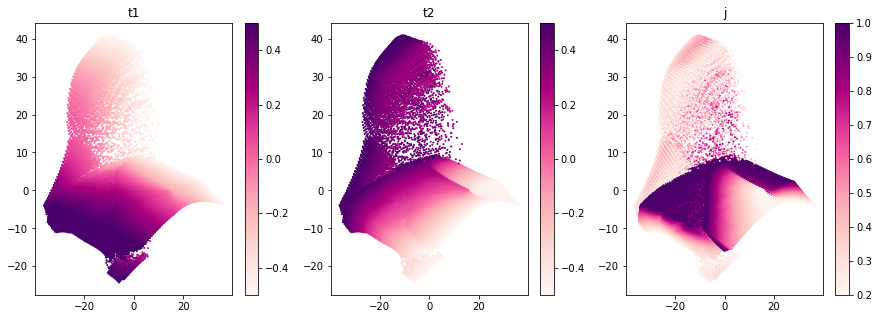

In [31]:
names = ['t1', 't2', 'j']
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
for i in range(3):
    c = ax[i].scatter(principal_components[:,0], principal_components[:,1], c=params[:,i], s=1, cmap=plt.cm.get_cmap('RdPu'))

    plt.colorbar(c, ax = ax[i])
    ax[i].set_title(names[i])